# Práctico 1: Obtención, exploración y pretratamiento de datos

## 1. Cargar los datos a estudiar

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [43]:
df = pd.read_csv('permisos_construccion_2.csv')

/tmp/ipykernel_321560/1806540388.py:1: DtypeWarning: Columns (22,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('permisos_construccion_2.csv')


## 2. Hacer un resumen con la explicación de las variables del juego de datos
<ol>
<li>
Identificación y ubicación del permiso:

- Permit Number: Número de identificación del permiso.
- Permit Type: Tipo y definición del permiso.
- Block, Lot: Información de ubicación básica.
- Street Number, Street Name, Street Name Suffix, Unit, Unit Suffix: Detalles específicos de la dirección.
- Zipcode, Location: Código postal y coordenadas de la propiedad.
- Neighborhoods - Analysis Boundaries: Barrio al que pertenece la propiedad.
    
</li>

<li>
Fechas clave del proceso de permisos:

- Permit Creation Date: Fecha de creación del permiso.
- Filed Date: Fecha de presentación.
- Issued Date: Fecha de emisión.
- Completed Date: Fecha de finalización del proyecto.
- First Construction Document Date: Primera documentación de construcción.
- Current Status Date: Fecha del estado actual del permiso.
- Permit Expiration Date: Fecha de expiración del permiso.
  
</li>

<li>
Detalles del proyecto de construcción:

- Description: Descripción del propósito del permiso.
- Number of Existing Stories: Número de pisos existentes.
- Number of Proposed Stories: Número de pisos propuestos.
- Existing Use, Proposed Use: Uso actual y uso propuesto del edificio.
- Existing Units, Proposed Units: Número de unidades existentes y propuestas.
- Existing Construction Type, Proposed Construction Type: Tipo de construcción existente y propuesto.
- Plansets: Planos generales del proyecto.

</li>

<li>
Costos y cumplimiento:

- Estimated Cost, Revised Cost: Costos estimados y revisados del proyecto.
- TIDF Compliance: Cumplimiento con normativas específicas.

</li>

<li>
Estados y notificaciones:

- Current Status: Estado actual del permiso.
- Structural Notification: Notificaciones estructurales legales.
- Fire Only Permit: Permisos relacionados únicamente con la prevención de incendios.
- Voluntary Soft-Story Retrofit: Adaptaciones voluntarias para cumplimiento sísmico.
</li>

<li>    
Información adicional:

- Site Permit: Permiso relacionado con el sitio de construcción.
- Supervisor District: Distrito supervisorial de la propiedad.
- Record ID: Identificación del registro (puede ser menos relevante).
</li>
</ol>

## 3. Realizar un análisis exploratorio de los datos


### a. Calcular y mostrar la cantidad de filas y columnas

In [44]:
num_rows = len(df)
num_columns = len(df.columns)
print(f"Cantidad de filas {num_rows}")
print(f"Cantidad de columnas {num_columns}")

Cantidad de filas 198910
Cantidad de columnas 43


### b. Observar y mostrar las primeras 5 filas

In [45]:
df[:5]

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,M788927,8,otc alterations permit,05/23/2017,0215,001,1333,NaN,jOnEs,St,...,NaN,NaN,NaN,NaN,NaN,3.0,Nob Hill,94109.0,"(37.79362102799777, -122.41488237355445)",1464153232862
1,201305318356,8,otc alterations permit,05/31/2013,1810,017A,1483,NaN,43rD,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,4.0,Sunset/Parkside,94122.0,"(37.759041020475465, -122.50286985467523)",1306559115258
2,201705106205,8,otc alterations permit,05/10/2017,5700,027,431,NaN,pReNtIsS,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,9.0,Bernal Heights,94110.0,"(37.73778863007536, -122.41197863877355)",1462579187173
3,201410279983,8,otc alterations permit,10/27/2014,0661,005,2020,NaN,bUsH,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Pacific Heights,94115.0,"(37.78762264983362, -122.43099126735969)",136037778128
4,201310280388,8,otc alterations permit,10/28/2013,3642,051A,871,NaN,cApP,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,9.0,Mission,94110.0,"(37.75275550565926, -122.41707462095194)",1322242163712


### c. Evaluar la existencia de datos faltantes y duplicados. Cuantificarlos y calcular el porcentaje sobre el total de filas.

<Axes: >

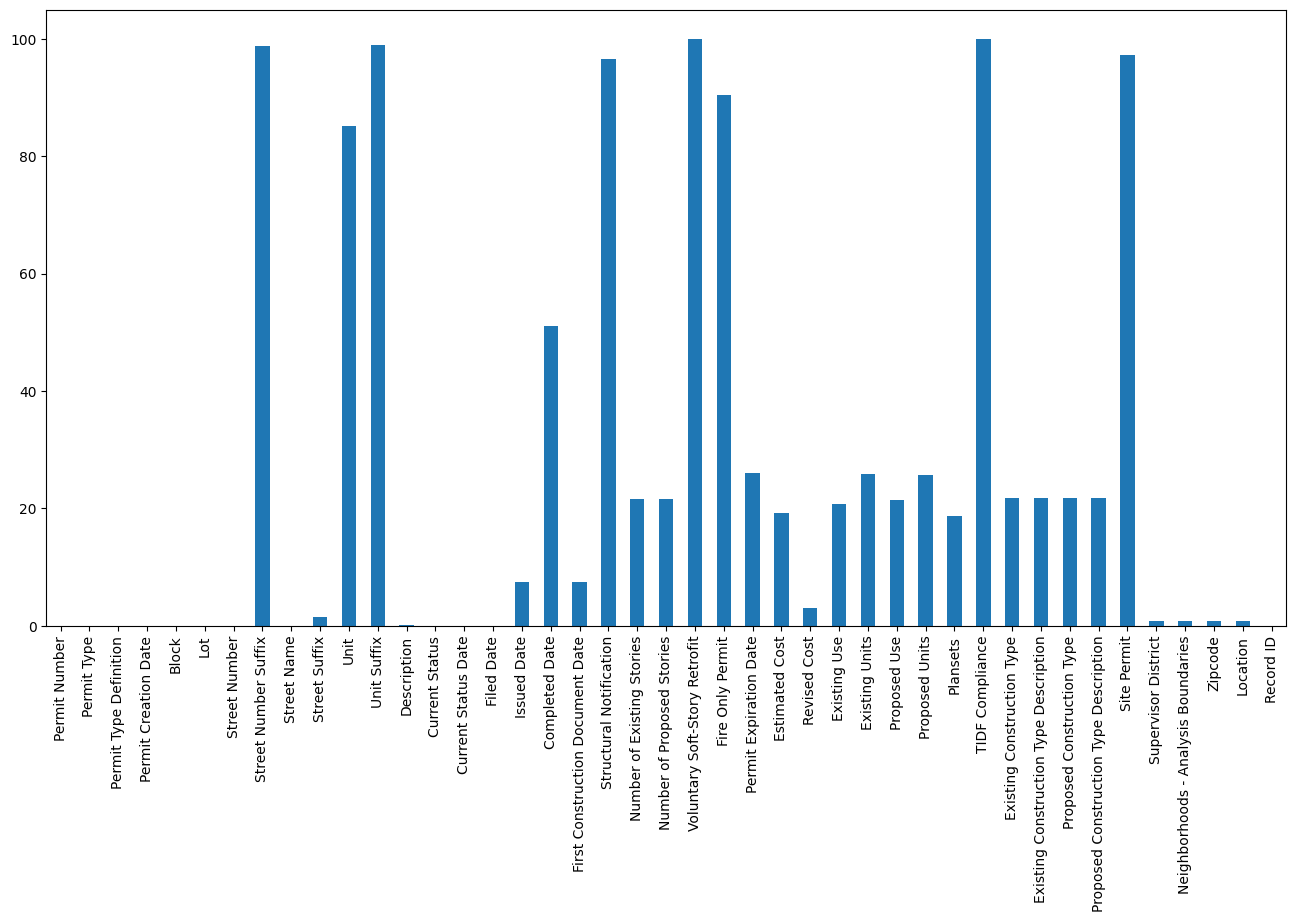

In [46]:
null_values = df.isna()
porcentages = (null_values.sum() / num_rows * 100)
porcentages.plot(kind='bar', figsize=(16,8))

In [47]:
print(porcentages)

Permit Number                              0.000000
Permit Type                                0.000000
Permit Type Definition                     0.000000
Permit Creation Date                       0.000000
Block                                      0.000000
Lot                                        0.000000
Street Number                              0.000000
Street Number Suffix                      98.885928
Street Name                                0.000000
Street Suffix                              1.391584
Unit                                      85.179227
Unit Suffix                               99.014127
Description                                0.145795
Current Status                             0.000000
Current Status Date                        0.000000
Filed Date                                 0.000000
Issued Date                                7.511940
Completed Date                            51.136192
First Construction Document Date           7.514957
Structural N

In [48]:
df['Plansets'].value_counts()

Plansets
2.0       98093
0.0       63247
3.0         250
4.0           3
1.0           2
6.0           2
9000.0        1
20.0          1
Name: count, dtype: int64

### d. Para los datos faltantes, evaluar posibles motivos de esto en cada caso.

Realizado en el informe

### e. Para variables discretas, evaluar los posibles valores de cada variable (valores únicos).

In [49]:
#3.E
# Código para descubrir las columnas discretas
# for column in df.columns:
#     values = df[column].unique()
#     if len(values) < 10:
#         print('Los valores únicos de la columna', column, 'son:', values)

discrete_columns = [
    'Structural Notification',
    'Voluntary Soft-Story Retrofit',
    'Fire Only Permit',
    'Existing Construction Type Description',
    'Proposed Construction Type Description',
    'TIDF Compliance',
    'Site Permit',
] 

discrete_df = df[discrete_columns].fillna('N')

for column in discrete_df.columns:
    unique_values = discrete_df[column].unique()
    print('Los valores únicos de la columna', column, 'son', len(unique_values), 'y son:', unique_values)

Los valores únicos de la columna Structural Notification son 2 y son: ['N' 'Y']
Los valores únicos de la columna Voluntary Soft-Story Retrofit son 2 y son: ['N' 'Y']
Los valores únicos de la columna Fire Only Permit son 2 y son: ['N' 'Y']
Los valores únicos de la columna Existing Construction Type Description son 9 y son: ['N' 'wood frame (5)' 'constr type 3' 'constr type 1' 'constr type 2'
 'constr type 4' ' constr type 1 ' ' constr type 3 ' ' wood frame (5) ']
Los valores únicos de la columna Proposed Construction Type Description son 6 y son: ['N' 'wood frame (5)' 'constr type 3' 'constr type 2' 'constr type 1'
 'constr type 4']
Los valores únicos de la columna TIDF Compliance son 3 y son: ['N' 'P' 'Y']
Los valores únicos de la columna Site Permit son 2 y son: ['N' 'Y']


### f. Cuantificar los valores únicos del punto e) y realizar histogramas.

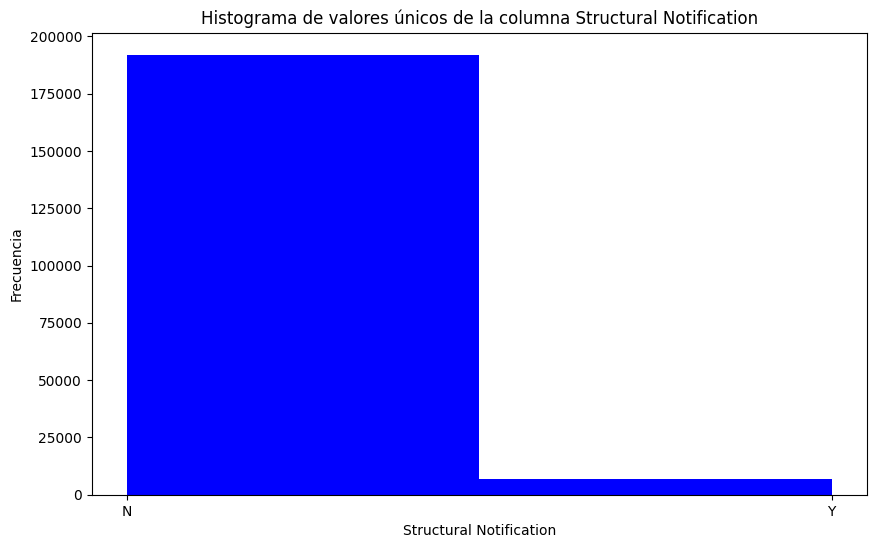

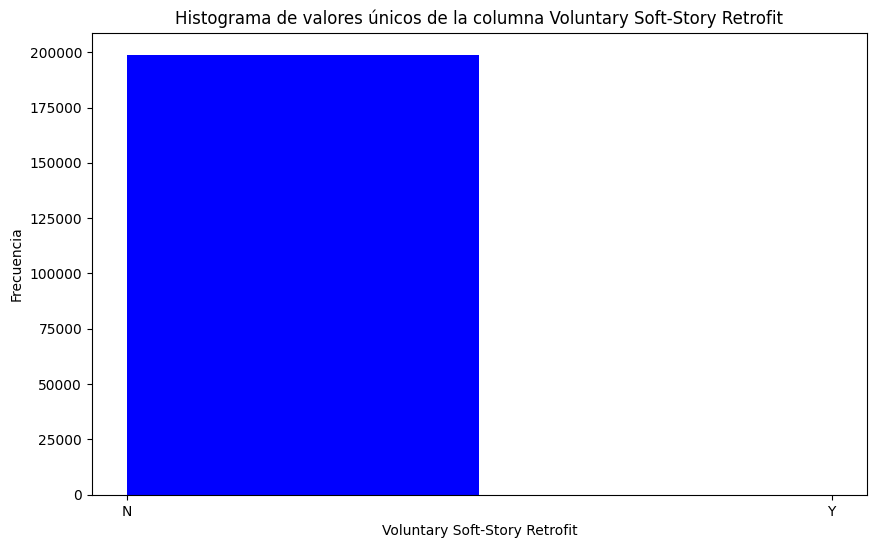

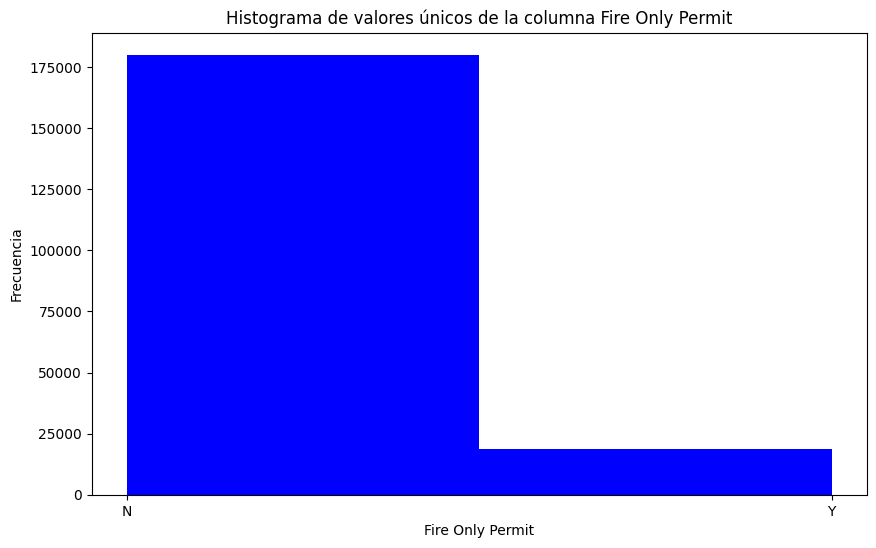

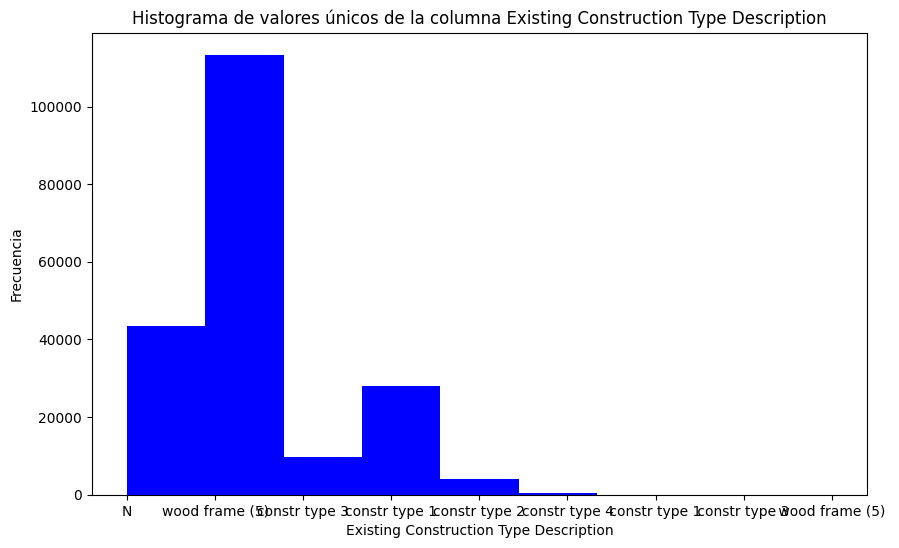

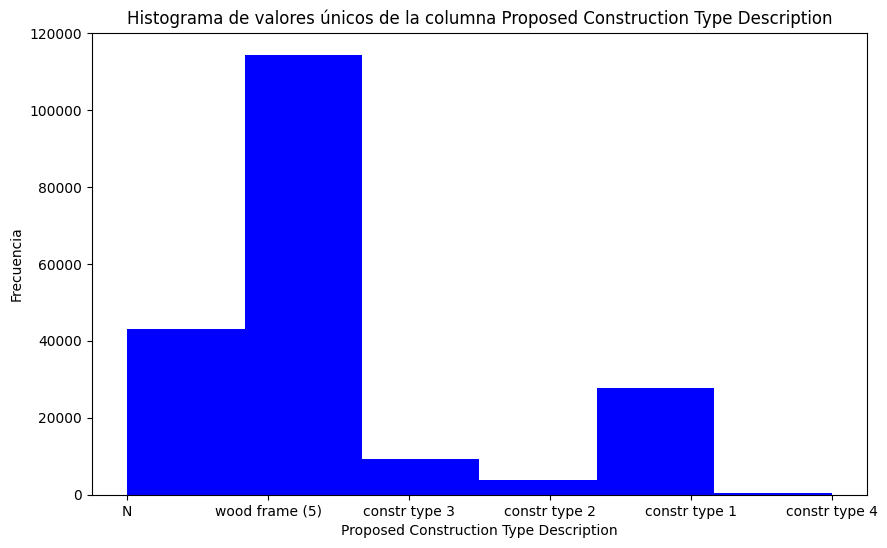

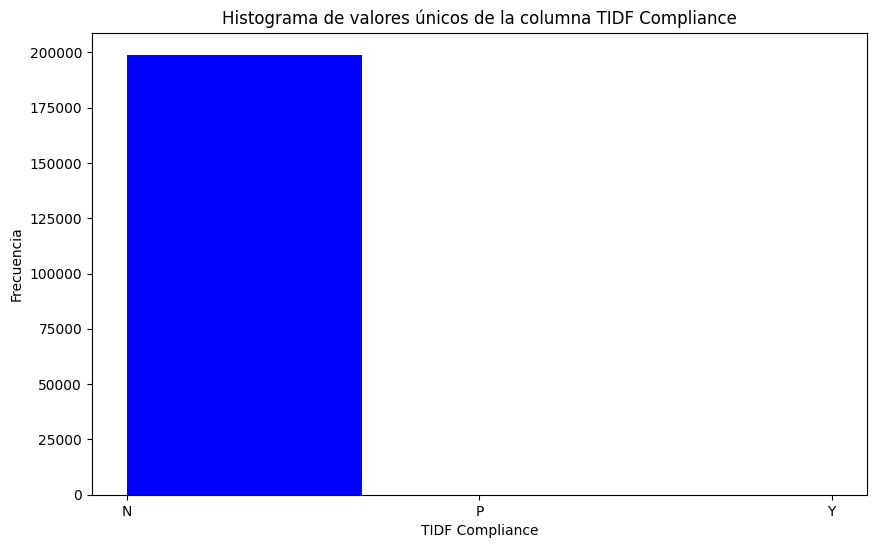

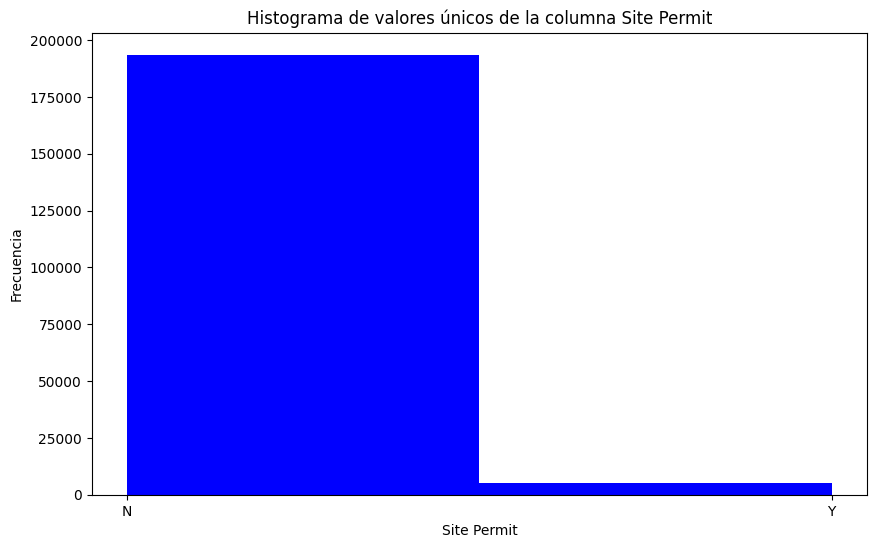

In [50]:
#3.F
for column in discrete_df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(discrete_df[column], bins=len(discrete_df[column].unique()), color='blue')
    plt.title('Histograma de valores únicos de la columna ' + column)
    plt.xlabel(column)
    # plt.xticks(rotation=90)
    plt.ylabel('Frecuencia')
    plt.show()

### g. Evaluar la existencia de datos inconsistentes.

In [51]:
df[['Permit Type','Permit Type Definition']].drop_duplicates() # Primera inconsistencia

,Permit Type,Permit Type Definition
0,8,otc alterations permit
10,2,new construction wood frame
16,4,sign - erect
20,3,additions alterations or repairs
189,6,demolitions
263,1,new construction
2189,7,wall or painted sign
3092,5,grade or quarry or fill or excavate
4336,8,otc alterations permit
19458,1,new construction


In [52]:
df[['Existing Construction Type','Existing Construction Type Description']].drop_duplicates() # Segunda inconsistencia

,Existing Construction Type,Existing Construction Type Description
0,NaN,NaN
1,5.0,wood frame (5)
8,3.0,constr type 3
14,1.0,constr type 1
91,2.0,constr type 2
437,4.0,constr type 4
60250,1.0,constr type 1
63044,3.0,constr type 3
69554,-99999.0,wood frame (5)
71803,-99999.0,NaN


## 4. Limpieza de datos

### a. Tomar una decisión respecto a los datos faltantes, duplicados, inconsistencias y cualquier inconveniente que encuentren con los datos

In [53]:
import pandas as pd
import numpy as np

# Asegúrate de que tu DataFrame 'df' esté cargado con los datos correspondientes

# 1. Eliminar columnas que no aportan valor al análisis
columns_to_drop = [
    'Street Number Suffix', 'Unit Suffix', 'Structural Notification',
    'Voluntary Soft-Story Retrofit', 'TIDF Compliance', 'Site Permit'
]
df.drop(columns=columns_to_drop, inplace=True)

# 2. Rellenar 'Street Suffix' con la moda
street_suffix_mode = df['Street Suffix'].mode()[0]
df['Street Suffix'].fillna(street_suffix_mode, inplace=True)

# 3. Eliminar filas con valores faltantes en las columnas de fechas específicas
df.dropna(subset=['Issued Date', 'Completed Date', 'First Construction Document Date'], inplace=True)

# 4. Mantener nulos en 'Number of Existing Stories' y 'Number of Proposed Stories'
# (No se necesita acción adicional)

# 5. Rellenar 'Fire-Only Permit' con "N" donde hay nulos
df['Fire Only Permit'].fillna('N', inplace=True)

# 6. Rellenar 'Permit Expiration Date' con "indefinida" donde hay nulos
df['Permit Expiration Date'].fillna('indefinida', inplace=True)

# 7. Mantener nulos en 'Estimated Cost' y 'Revised Cost'
# (No se necesita acción adicional)

# 8. Mantener nulos en 'Unit' y 'Existing Units'
# (No se necesita acción adicional)

# 9. Rellenar 'Proposed Use' y 'Existing Use' con "No definido" donde hay nulos
df['Proposed Use'].fillna('No definido', inplace=True)
df['Existing Use'].fillna('No definido', inplace=True)

# 10. Mantener nulos en 'Proposed Units'
# (No se necesita acción adicional)

# 11. Rellenar 'Plansets' con 0.0 donde hay nulos
df['Plansets'].fillna(0.0, inplace=True)

# 12. Mantener nulos en columnas de tipo de construcción y localización
# (No se necesita acción adicional)

# Visualizar el DataFrame modificado
print(df.head())


  Permit Number  Permit Type  Permit Type Definition Permit Creation Date  \
1  201305318356            8  otc alterations permit           05/31/2013   
3  201410279983            8  otc alterations permit           10/27/2014   
5  201307161925            8  otc alterations permit           07/16/2013   
8  201404113025            8  otc alterations permit           04/11/2014   
9  201702109134            8  otc alterations permit           02/10/2017   

  Block   Lot  Street Number Street Name Street Suffix  Unit  ... Plansets  \
1  1810  017A           1483        43rD            Av   NaN  ...      2.0   
3  0661   005           2020        bUsH            St   NaN  ...      0.0   
5  3565   076           3479        16tH            St   NaN  ...      0.0   
8  3740   029            126      fOlSoM            St   NaN  ...      2.0   
9  0195   001            735  mOnTgOmErY            St   NaN  ...      2.0   

  Existing Construction Type Existing Construction Type Description 

/tmp/ipykernel_321560/847277387.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Street Suffix'].fillna(street_suffix_mode, inplace=True)
/tmp/ipykernel_321560/847277387.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [54]:
# Limpiar caracteres específicos y espacios en blanco
df['Permit Type Definition'] = df['Permit Type Definition'].str.replace('#', '').str.strip()

In [55]:
df[['Permit Type','Permit Type Definition']].drop_duplicates().sort_values('Permit Type') # Primera inconsistencia

,Permit Type,Permit Type Definition
15409,1,new construction
740,2,new construction wood frame
65,3,additions alterations or repairs
16,4,sign - erect
18754,5,grade or quarry or fill or excavate
920,6,demolitions
3819,7,wall or painted sign
1,8,otc alterations permit


In [56]:
# Eliminar espacios en blanco al principio y al final
df['Existing Construction Type Description'] = df['Existing Construction Type Description'].str.strip()
df.loc[(df['Existing Construction Type'] == -99999.0) & (pd.isna(df['Existing Construction Type Description'])), 'Existing Construction Type'] = np.nan
df.loc[(df['Existing Construction Type'] == -99999.0) | (df['Existing Construction Type'] == 99999.0),'Existing Construction Type'] = 5.0

In [57]:
df[['Existing Construction Type','Existing Construction Type Description']].drop_duplicates().sort_values('Existing Construction Type') 

,Existing Construction Type,Existing Construction Type Description
14,1.0,constr type 1
140,2.0,constr type 2
8,3.0,constr type 3
437,4.0,constr type 4
1,5.0,wood frame (5)
158,NaN,NaN


## 5. Normalización de los datos

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Normalización inplace de 'Estimated Cost'
df[['Estimated Cost']] = scaler.fit_transform(df[['Estimated Cost']])
print(df['Estimated Cost'][:5])

# Normalización inplace de 'Revised Cost'
df[['Revised Cost']] = scaler.fit_transform(df[['Revised Cost']])
print(df['Revised Cost'][:5])

df[['Number of Existing Stories']] = scaler.fit_transform(df[['Number of Existing Stories']])
print(df['Number of Existing Stories'][:5])

# Normalización inplace de 'Revised Cost'
df[['Number of Proposed Stories']] = scaler.fit_transform(df[['Number of Existing Stories']])
print(df['Number of Existing Stories'][:5])


1   -0.063064
3   -0.039700
5   -0.067635
8    0.051722
9   -0.075252
Name: Estimated Cost, dtype: float64
1   -0.072172
3   -0.049249
5   -0.076657
8    0.040449
9   -0.084130
Name: Revised Cost, dtype: float64
1   -0.444387
3   -0.444387
5   -0.331619
8   -0.557155
9   -0.218851
Name: Number of Existing Stories, dtype: float64
1   -0.444387
3   -0.444387
5   -0.331619
8   -0.557155
9   -0.218851
Name: Number of Existing Stories, dtype: float64


In [63]:
from ydata_profiling import ProfileReport


# Generar el reporte
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("revised_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]